In [ ]:
# example of loading the mnist dataset
from keras.datasets import fashion_mnist
from matplotlib import pyplot

Using TensorFlow backend.


In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

4423680/4422102 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


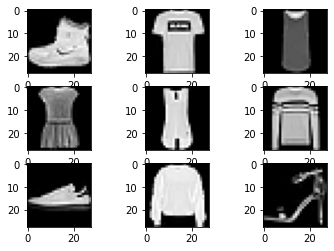

In [ ]:
# plot first few images from training data
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

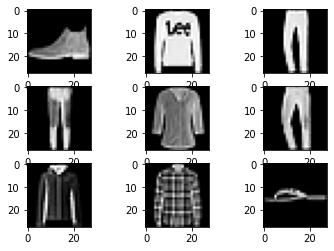

In [ ]:
# plot first few images from test data
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot vector conversion of  output labels
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# import the classes required to create a CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(16, (5, 5), strides =(2,2), activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
#To display the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 12, 12, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_split=0.15, epochs=200,batch_size=32, verbose=2)

Train on 51000 samples, validate on 9000 samples
Epoch 1/200
 - 12s - loss: 0.6010 - accuracy: 0.7805 - val_loss: 0.4459 - val_accuracy: 0.8413
Epoch 2/200
 - 12s - loss: 0.3952 - accuracy: 0.8551 - val_loss: 0.3763 - val_accuracy: 0.8624
Epoch 3/200
 - 12s - loss: 0.3434 - accuracy: 0.8726 - val_loss: 0.3665 - val_accuracy: 0.8658
Epoch 4/200
 - 12s - loss: 0.3151 - accuracy: 0.8831 - val_loss: 0.3329 - val_accuracy: 0.8769
Epoch 5/200
 - 12s - loss: 0.2927 - accuracy: 0.8907 - val_loss: 0.3332 - val_accuracy: 0.8807
Epoch 6/200
 - 12s - loss: 0.2757 - accuracy: 0.8988 - val_loss: 0.3203 - val_accuracy: 0.8850
Epoch 7/200
 - 12s - loss: 0.2613 - accuracy: 0.9023 - val_loss: 0.3148 - val_accuracy: 0.8844
Epoch 8/200
 - 12s - loss: 0.2479 - accuracy: 0.9075 - val_loss: 0.3223 - val_accuracy: 0.8862
Epoch 9/200
 - 12s - loss: 0.2380 - accuracy: 0.9110 - val_loss: 0.2990 - val_accuracy: 0.8922
Epoch 10/200
 - 12s - loss: 0.2245 - accuracy: 0.9153 - val_loss: 0.3026 - val_accuracy: 0.8919


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy: %.2f%%" % (scores[1]*100))

Baseline Error: 11.61%
Accuracy: 88.39%
